In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

$$
cov[x,y]=\frac{1}{n}\sum_{i=1}^n (x_i - \mu_x)(y_i - \mu_y)
$$

$$
\rho = \frac{cov[x,y]}{\sigma_x \sigma_y}
$$

In [2]:
np.random.seed(145) # fijar una semilla para reproducir los resultados
x = np.random.normal(10,2,20)
y = 2*x + np.random.normal(10,3,20)

Text(0, 0.5, 'y')

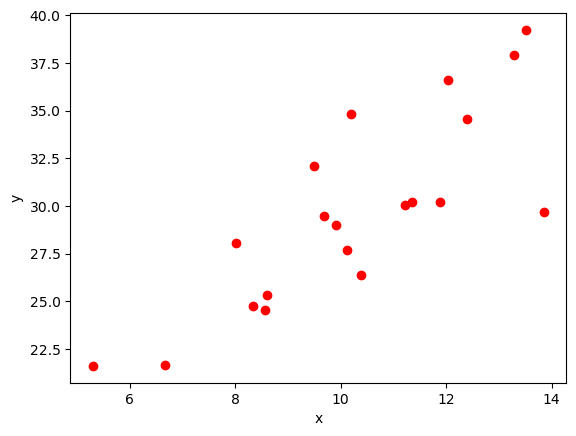

In [3]:
plt.scatter(x,y,c='red')
plt.xlabel('x')
plt.ylabel('y')

In [4]:
def cov(x,y):
    n = len(x)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    return np.sum((x-mean_x)*(y-mean_y)) * (1/(n-1))

cov(x,y)

9.300765888419196

In [5]:
np.cov(x,y)

array([[ 5.17027578,  9.30076589],
       [ 9.30076589, 25.30850725]])

In [6]:
np.var(x,ddof=1) # ddof = 1: para la muestra, ddof=0 para poblacion


5.170275778561246

In [7]:
np.var(y,ddof=1)

25.30850725235698

In [8]:
std_x = np.sqrt(cov(x,x))
std_y = np.sqrt(cov(y,y))
rho = cov(x,y) / (std_x * std_y)
rho

0.813071228491848

In [9]:
np.corrcoef(x,y,ddof=1) # para muestra ddof=1

/tmp/ipykernel_1869422/1296909308.py:1: DeprecationWarning: bias and ddof have no effect and are deprecated
  np.corrcoef(x,y,ddof=1) # para muestra ddof=1


array([[1.        , 0.81307123],
       [0.81307123, 1.        ]])

In [10]:
iris = sb.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [11]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
 # matriz de correlaciones
cor_mat = iris.corr(numeric_only=True)
cor_mat

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

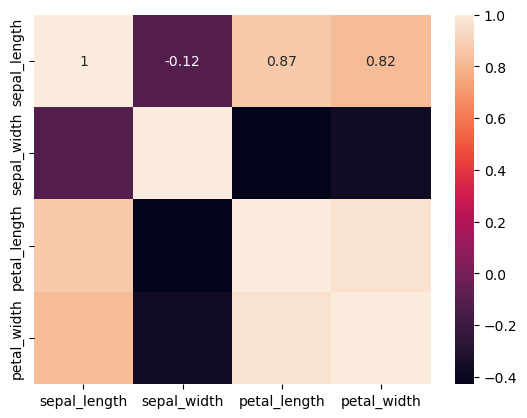

In [13]:
# mapa de calor
sb.heatmap(data=cor_mat,annot=True)

In [14]:
housing = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


/home/mrrobot/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mrrobot/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mrrobot/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mrrobot/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

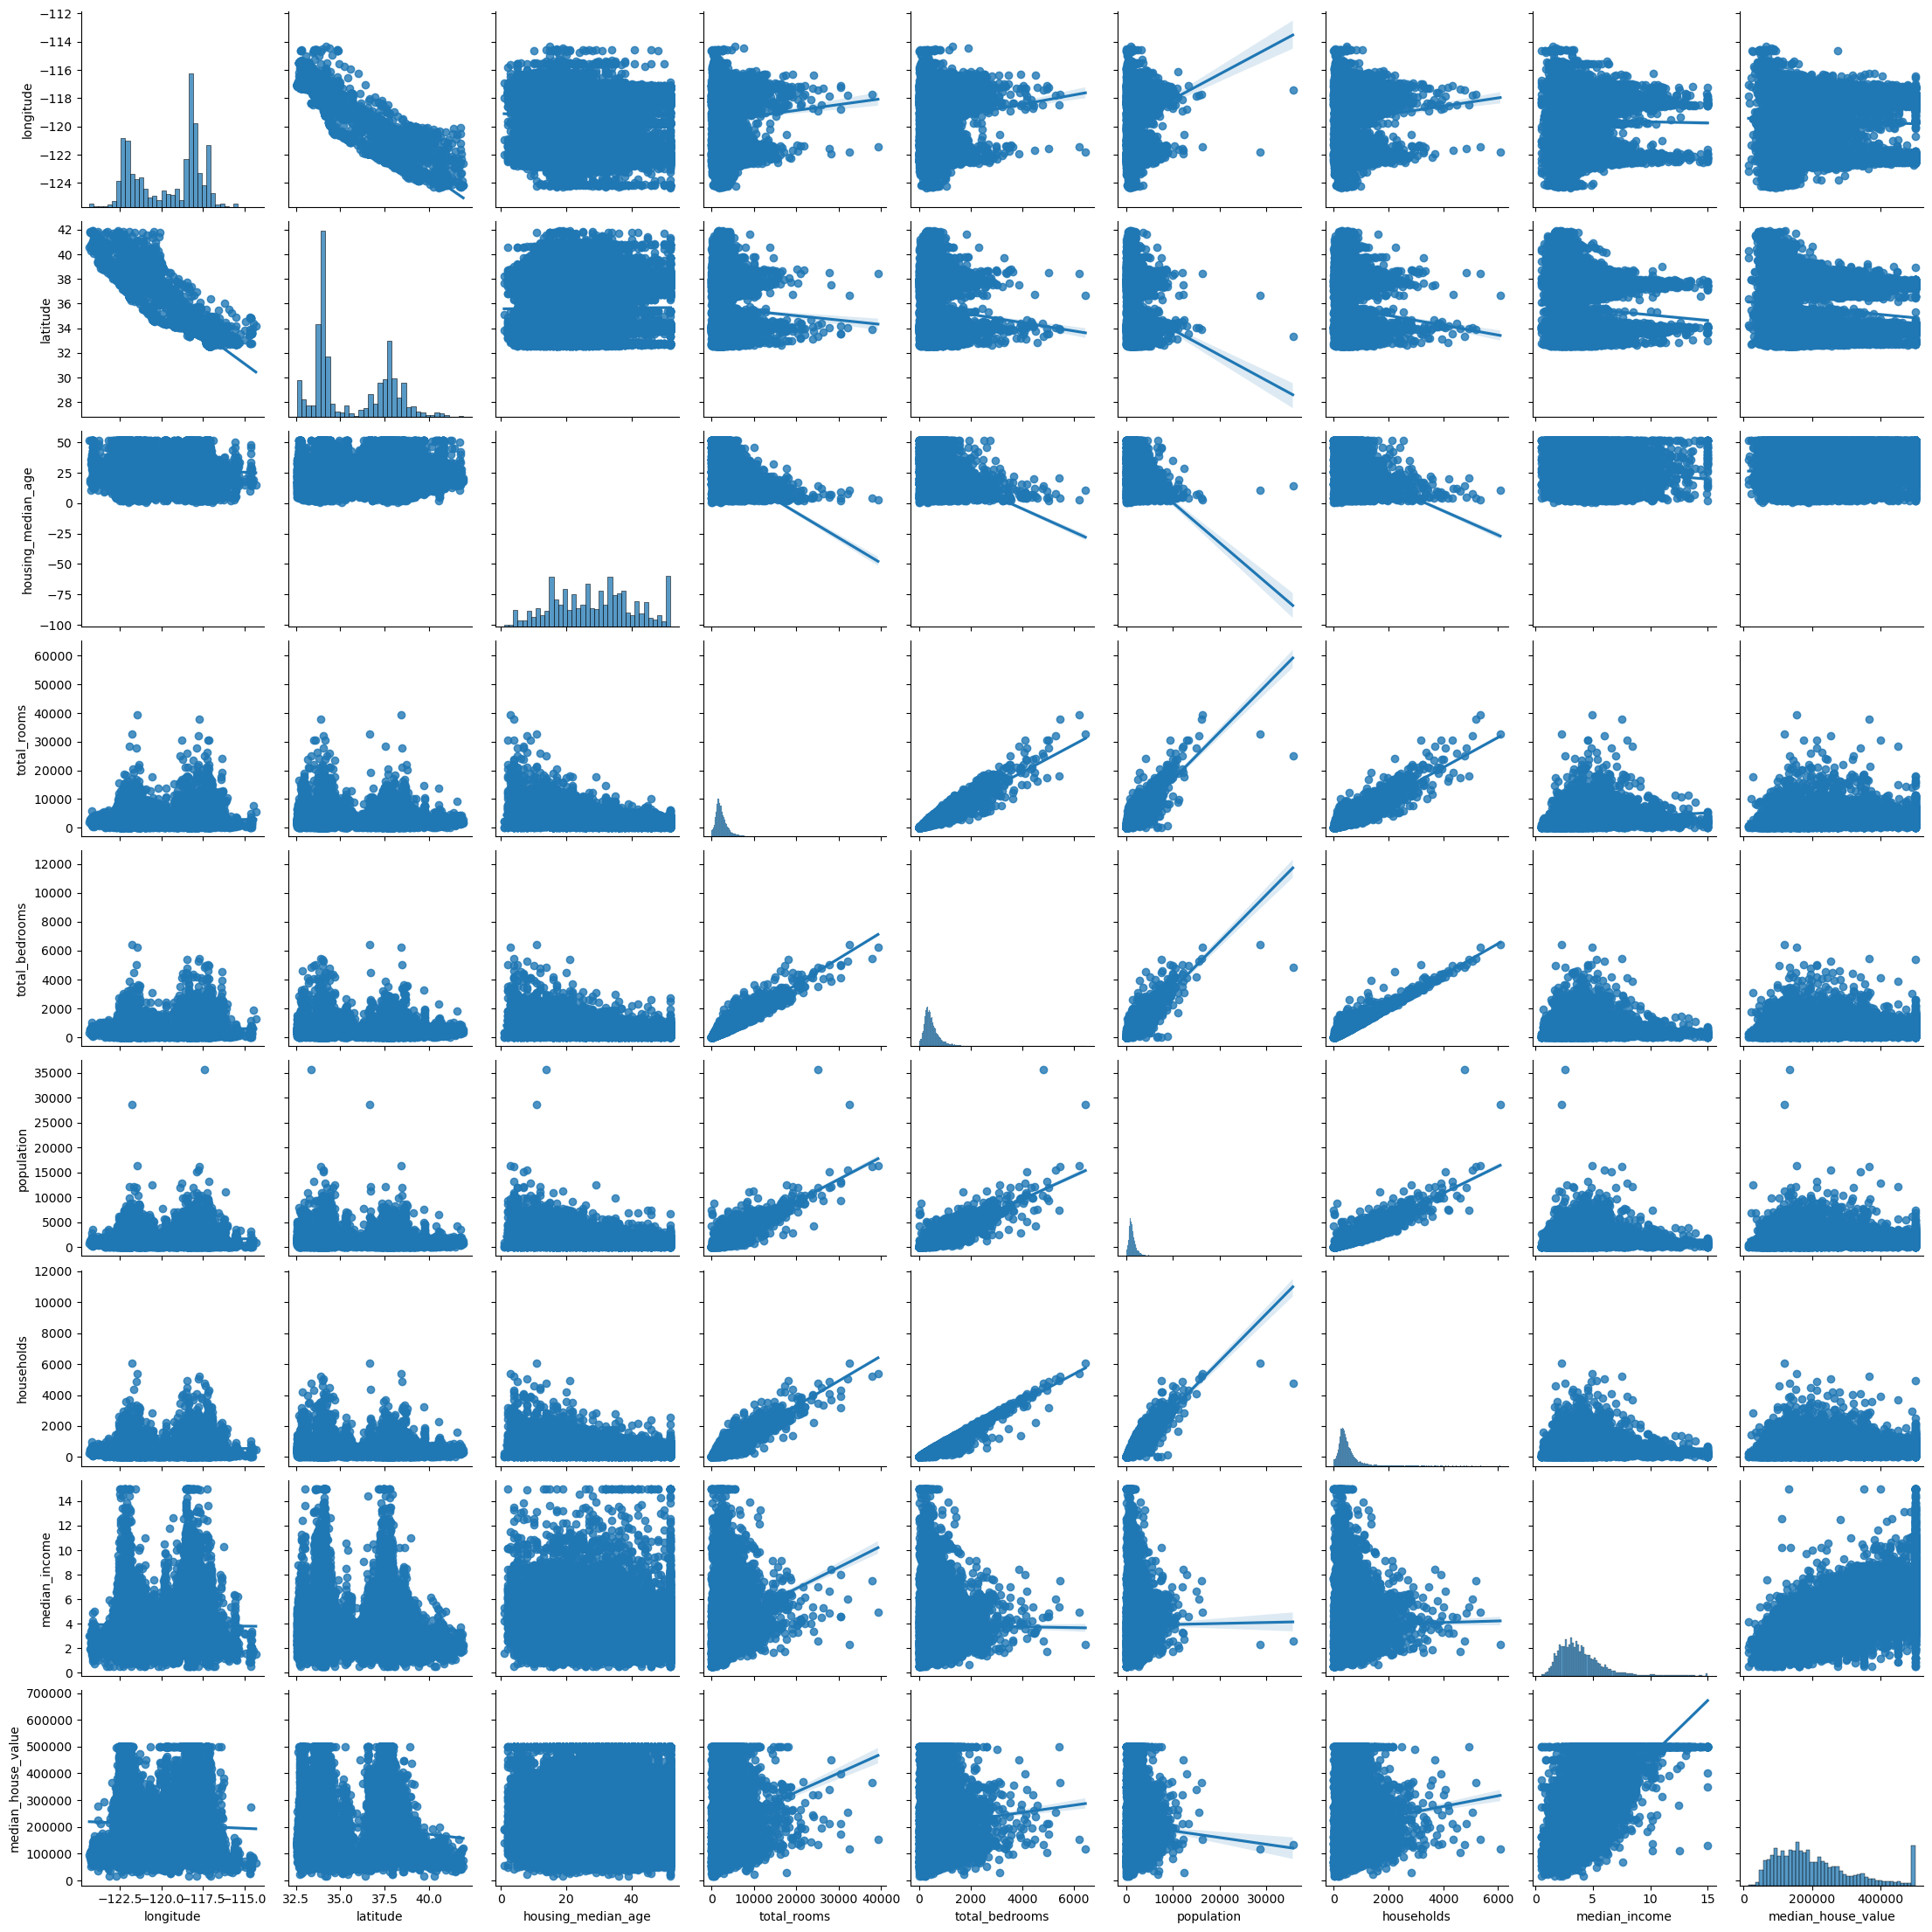

In [17]:
import seaborn as sb

sb.pairplot(data=housing, kind='reg')

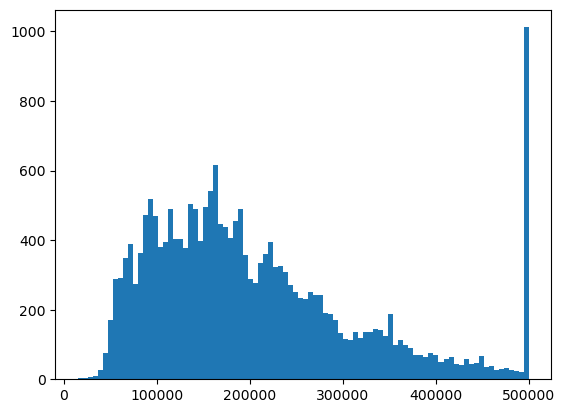

In [20]:
plt.hist(housing['median_house_value'],bins=90);
housing['median_house_value'].hist(bins=90)

<Axes: >

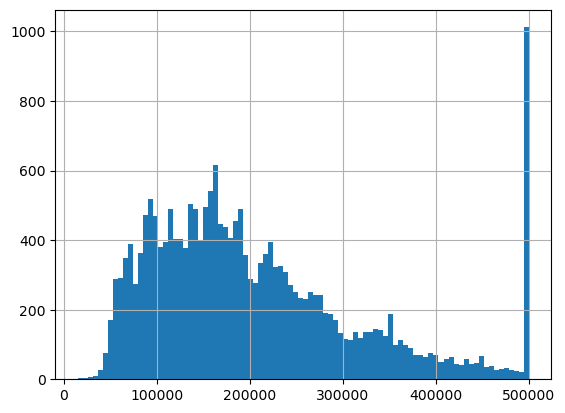

In [21]:
housing['median_house_value'].hist(bins=90)

In [23]:
housing.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [27]:
cor_mat = housing.drop(['ocean_proximity'], axis=1).corr()

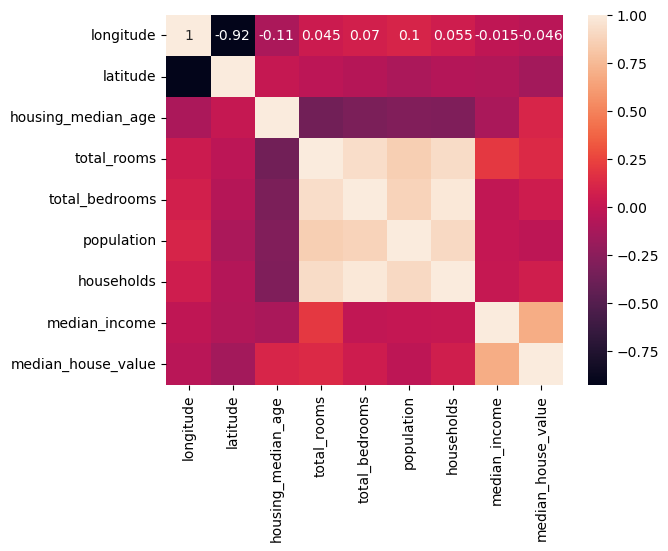

In [32]:
sb.heatmap(data=cor_mat, annot=True);

In [36]:
cor_mat['median_house_value'].abs().sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
latitude              0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
longitude             0.045967
population            0.024650
Name: median_house_value, dtype: float64

In [41]:
cor_mat_reduced = cor_mat['median_house_value']
cor_mat_reduced.abs() > 0.1

longitude             False
latitude               True
housing_median_age     True
total_rooms            True
total_bedrooms        False
population            False
households            False
median_income          True
median_house_value     True
Name: median_house_value, dtype: bool

In [46]:
cor_mat_reduced[cor_mat_reduced.abs() > 0.1].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
latitude             -0.144160
Name: median_house_value, dtype: float64

In [ ]:
selector = ['median_income', 'total_rooms', 'housing_median_age', 'latitude']
